# Task 2

# IMPORTING LIBRARIES

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# LOADING DATASET

In [2]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# EDA

In [4]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


# ANNUAL SAL OF EACH CUSTOMER

In [24]:
df_salary = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salary.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47,970
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65,3578
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51,1916
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39,1711
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73,3903


In [15]:
salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_salary.loc[customer_id]["amount"]))
    
df["annual_salary"] = salaries

In [16]:
df_cust = df.groupby("customer_id").mean()
df_cust.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


In [28]:
df_cust.columns

Index(['card_present_flag', 'merchant_code', 'balance', 'age', 'amount',
       'annual_salary'],
      dtype='object')

# ANNUAL SAL VS AGE

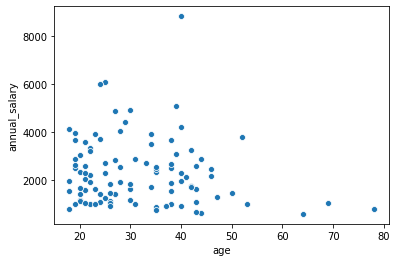

In [25]:
plot_age_sal = sns.scatterplot(x="age", y="annual_salary", data=df_cust)

# AMOUNT BY ANNUAL SAL

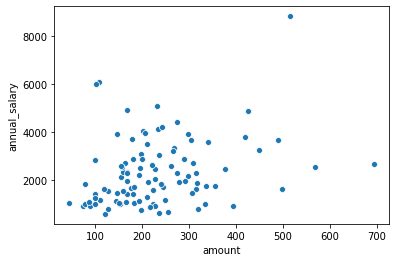

In [29]:
plot_amt_sal = sns.scatterplot(x="amount", y="annual_salary", data=df_cust)

# CHECKING CORRELATION

In [92]:
df_lr = df_cust[['card_present_flag', 'balance', 'age', 'amount','annual_salary']]
df_lr.head()

,card_present_flag,balance,age,amount,annual_salary
customer_id,,,,,
CUS-1005756958,0.812500,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,22272.433755,34,147.145796,3903


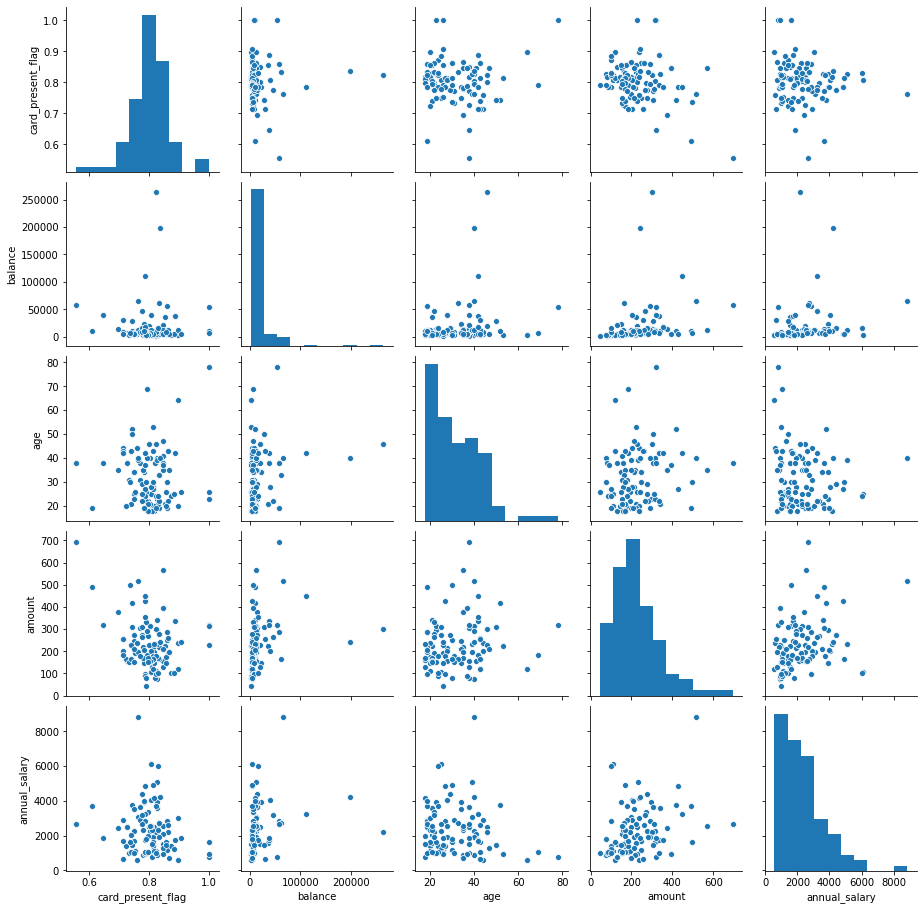

In [93]:
sns.pairplot(df_lr)
plt.show()

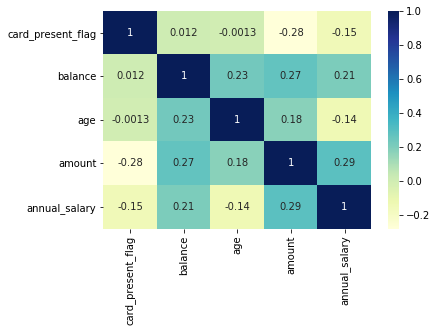

In [94]:
sns.heatmap(df_lr.corr(), annot = True, cmap="YlGnBu")

# CORR AGE N ANNUAL SAL, BAL N AGE, BAL N ANNUAL SAL

In [32]:
df_cust['age'].corr(df_cust['annual_salary'])

-0.13522694954964612

In [33]:
df_cust['balance'].corr(df_cust['age'])

0.231963096050887

In [34]:
df_cust['balance'].corr(df_cust['annual_salary'])

0.20564308404356624

# LIN REG

In [65]:
# SPLITTING DATA
N_train = int(len(df_cust)*0.7)
X_train = df_cust.drop("annual_salary", axis=1).iloc[:N_train]
Y_train = df_cust["annual_salary"].iloc[:N_train]
X_test = df_cust.drop("annual_salary", axis=1).iloc[N_train:]
Y_test = df_cust["annual_salary"].iloc[N_train:]


In [66]:
lin_reg = LinearRegression()

In [67]:
#FITTING DATA
lin_reg.fit(X_train, Y_train)
lin_reg.score(X_train, Y_train)

0.24688973319615712

# PREDICTING USING LIN REG

In [68]:
lin_reg.predict(X_test)

array([3132.72421023, 2175.39641246, 2098.83496666, 2648.18350248,
       1783.60238994, 2779.34238454, 2709.70361603, 2961.5936652 ,
       2244.52686912, 1665.19124951, 2038.4996552 , 2972.85574737,
       2006.76417873, 1846.04764406, 2291.3211743 , 2156.44498139,
       1879.88463891, 5508.09056187, 1970.1444943 , 2263.4707209 ,
       1764.79270295, 2744.0674848 , 2172.82833702, 3958.85094997,
       2337.95629146, 1839.16986473, 2173.64875609, 1559.47188362,
       1851.43350431, 2570.51455513])

In [69]:
y_predict=lin_reg.predict(X_test)

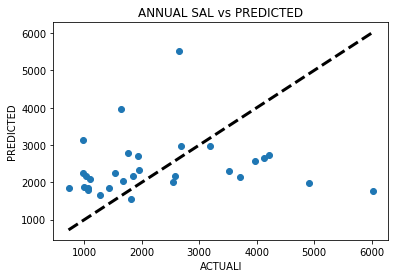

In [70]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_predict)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
ax.set_xlabel('ACTUALl')
ax.set_ylabel('PREDICTED')
ax.set_title("ANNUAL SAL vs PREDICTED")
plt.show()

In [40]:
# REG SCORE
lin_reg.score(X_test, Y_test)

-0.23854072913735003

In [44]:
# RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_test, y_predict)))

1481.7298083822498


In [46]:
# R SQUARE VALUE
lin_reg.score(X_train, Y_train)

0.24688973319615712

# HERE, R SQUARE IS CLOSE TO ZERO WHICH SHOWS THAT THIS MODEL DOESNT EXPLAIN VARAIBILITY OF YEARLY SAL.

# HERE, RMSE HAS HIGH VALUE WHERE A LOW VALUE IS DESIRABLE THAT EXPLAINS THE VARIANCE OF RESIDUALS

# LOW CORR VALUES SHOWS THE NEED TO APPLY OTHER MODELS

# DECISION TREE

In [47]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import DBSCAN
#from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
from subprocess import check_call

C:\Users\Farzana\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [50]:
# selecting categorical variables 

In [71]:
df_category = df[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [72]:
pd.get_dummies(df_category).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [73]:
N_train = int(len(df)*0.7)
X_train = pd.get_dummies(df_category).iloc[:N_train]
Y_train = df["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(df_category).iloc[N_train:]
Y_test = df["annual_salary"].iloc[N_train:]

In [74]:
# REGRESSION

In [75]:
dec_tree_reg = DecisionTreeRegressor()

In [76]:
dec_tree_reg.fit(X_train, Y_train)
dec_tree_reg.score(X_train, Y_train)

0.7524228033767403

In [77]:
dec_tree_reg.predict(X_test)

array([3649.2       , 1012.4       , 1642.57894737, ..., 3446.625     ,
       1043.        , 1642.57894737])

In [78]:

dec_tree_reg.score(X_test, Y_test)

0.6810541485492839

In [79]:
y_predict2 = dec_tree_reg.predict(X_test)

In [81]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test, y_predict2)))

791.9642301802277


In [102]:
# R SQUARE VALUE
dec_tree_reg.score(X_train, Y_train)

0.7524228033767403

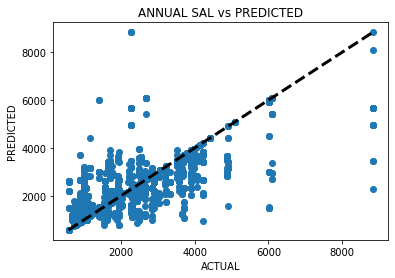

In [80]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_predict2)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
ax.set_xlabel('ACTUAL')
ax.set_ylabel('PREDICTED')
ax.set_title("ANNUAL SAL vs PREDICTED")
plt.show()

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Y_pred_default = dt_default.predict(X_test)
print(classification_report(Y_test, Y_pred_default))

              precision    recall  f1-score   support

         576       1.00      0.08      0.15        37
         596       0.00      0.00      0.00        18
         664       0.00      0.00      0.00         9
         725       0.00      0.00      0.00        21
         761       0.00      0.00      0.00        35
         782       0.00      0.00      0.00         9
         862       0.00      0.00      0.00        18
         892       0.96      0.72      0.82        64
         916       0.00      0.00      0.00        13
         917       0.98      0.73      0.84        67
         920       0.00      0.00      0.00        16
         970       0.00      0.00      0.00         7
         982       0.00      0.00      0.00        31
         983       0.00      0.00      0.00         7
         990       0.36      1.00      0.53        48
         996       0.00      0.00      0.00        51
        1002       0.34      1.00      0.51        88
        1013       1.00    

C:\Users\Farzana\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
print(confusion_matrix(Y_test,Y_pred_default))
print(accuracy_score(Y_test,Y_pred_default))

[[ 3  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0  0  0]]
0.2895101024079712


In [89]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

features_1 = list(df_category.columns[0:])
features_1

['txn_description', 'gender', 'age', 'merchant_state', 'movement']

In [90]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features_1, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ValueError: Length of feature_names, 5 does not match number of features, 19

# CLASSIFICATION

In [95]:
decision_class = DecisionTreeClassifier()

In [96]:
decision_class.fit(X_train, Y_train)
decision_class.score(X_train, Y_train)

0.7909845788849348

In [97]:
decision_class.predict(X_test)

array([2840, 1013,  996, ..., 4054, 1043,  996], dtype=int64)

In [100]:
y_predict3 = decision_class.predict(X_test)

In [98]:
decision_class.score(X_test, Y_test)

0.7553279822861888

In [101]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test, y_predict3)))

973.3322622702314


In [103]:
# R sq
decision_class.score(X_train, Y_train)

0.7909845788849348

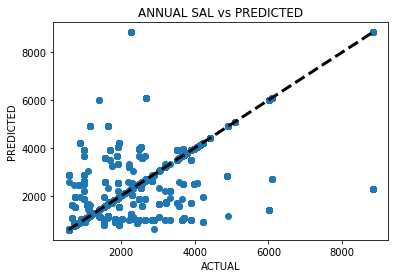

In [104]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_predict3)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
ax.set_xlabel('ACTUAL')
ax.set_ylabel('PREDICTED')
ax.set_title("ANNUAL SAL vs PREDICTED")
plt.show()

# HERE, R SQUARE IS CLOSE TO ONE WHICH SHOWS THAT THIS MODEL  EXPLAINS VARAIBILITY OF YEARLY SAL.
# HERE, RMSE A LOW VALUE IS DESIRABLE THAT EXPLAINS THE VARIANCE OF RESIDUALS

# DESPITE, DEC TREE HAVING HIGHER PERFORMANCE VALUE, IT FALLS SHORT WITH RMSE VALUE, WHICH INDICATES IT DOESNT FIT WELL. HENCE, A DIFFERENT MODEL IS REQUIRED TO BE IMPLEMENTED TO FIND AN ACCEPTABLE OUTCOME.